In [155]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit as fit

$$\alpha = \frac{1}{R} \frac{dR}{dT}$$

## Медная проволока
- Test1 -- охлаждение
- Test2 -- нагрев после охлаждения до +- комнатной температуры
- Test3 -- нагрев до +- 100 градусов

Последний файл с данными снимался руками, поскольку не было откалиброванной термопары для автоматизации процесса.

In [156]:
L = 6
D = 16 * 10 ** (-6)
S = np.pi * D ** 2 / 4

In [157]:
def linear(x, a, b):
    return a * x + b

Обработка даных с нагрева

In [158]:
data = pd.read_csv('Test1.csv', delimiter=';', names=['Time', 'V_sa', 'V_sh', 'I', 'R_sa', 'T'], header=2, dtype=np.float64)
data

,Time,V_sa,V_sh,I,R_sa,T
0,71.520,0.678067,0.000698,0.093109,7.28254,294.106
1,72.480,0.679796,0.000699,0.093157,7.29729,294.117
2,73.400,0.679752,0.000700,0.093307,7.28510,294.124
3,74.199,0.679562,0.000700,0.093350,7.27973,294.133
4,75.001,0.679611,0.000699,0.093211,7.29113,294.142
...,...,...,...,...,...,...
1445,1368.600,0.481770,0.000699,0.093171,5.17084,235.525
1446,1369.500,0.481549,0.000698,0.093090,5.17293,235.464
1447,1370.300,0.481276,0.000699,0.093194,5.16424,235.409
1448,1371.100,0.481378,0.000698,0.093064,5.17257,235.355


In [159]:
a, b = fit(linear, data['T'], data['R_sa'])[0]
a, b

(0.03686882240232352, -3.465146353494701)

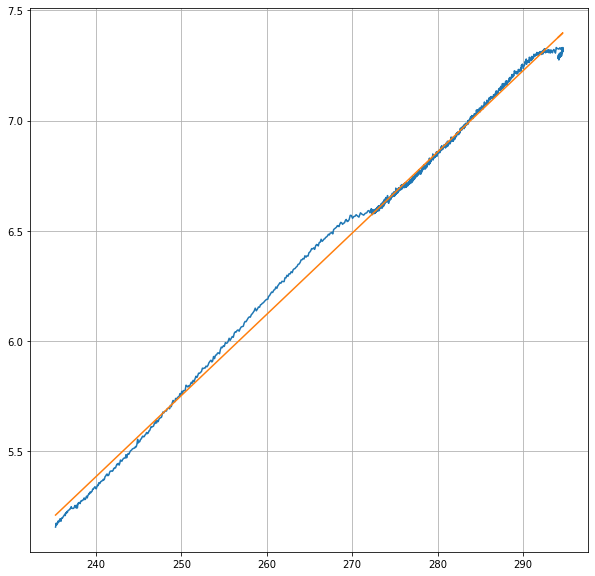

In [160]:
plt.figure(figsize=(10, 10))
plt.plot(data['T'], data['R_sa'])
plt.plot(data['T'], a * data['T'] + b)
plt.grid()
plt.show()

In [161]:
a / 7.4 # Из графика определили, что сопротивление образца из меди при 20 градусах Цельсия составляет 7.4 Ом.

0.004982273297611286

Обработка данных с охлаждения

In [162]:
data = pd.read_csv('Test2.csv', delimiter=';', names=['t', 'V_sa', 'V_sh', 'I', 'R_sa', 'T'], header=2, dtype=np.float64)
data

,t,V_sa,V_sh,I,R_sa,T
0,3.706,0.399312,0.000701,0.093510,4.27026,203.296
1,4.646,0.399275,0.000702,0.093588,4.26630,203.297
2,5.586,0.399320,0.000702,0.093545,4.26877,203.296
3,6.525,0.399273,0.000703,0.093683,4.26197,203.286
4,7.326,0.399385,0.000703,0.093754,4.25994,203.287
...,...,...,...,...,...,...
1996,1795.600,0.682018,0.000702,0.093571,7.28881,291.266
1997,1796.540,0.682184,0.000700,0.093341,7.30847,291.284
1998,1797.480,0.682766,0.000701,0.093501,7.30227,291.294
1999,1798.360,0.682681,0.000702,0.093543,7.29803,291.314


In [163]:
i = data[data['R_sa'] > 0]['R_sa'].argmin()

In [164]:
data.iloc[i]

t       88.155000
V_sa     0.085370
V_sh     0.000702
I        0.093572
R_sa     0.912343
T       77.290000
Name: 94, dtype: float64

In [165]:
(data['T'] < 123).sum() # Данные частично повреждены из-за проблем с оборудованием, поэтому самый низ слегка обрежем.

377

In [166]:
a, b = fit(linear, data['T'][400:].values, data['R_sa'][400:].values)[0]

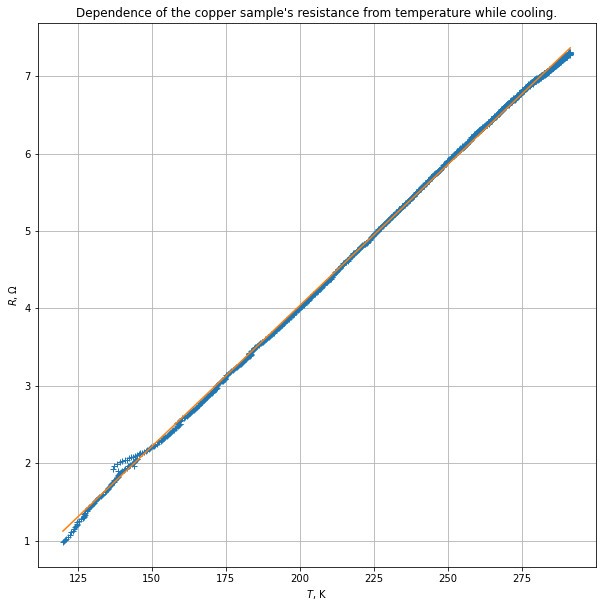

In [167]:
plt.figure(figsize=(10, 10))
plt.plot(data['T'][400:], data['R_sa'][400:], '+')
plt.plot(data['T'][400:], a * data['T'][400:] + b)
plt.xlabel('$T$, K')
plt.ylabel('$R, \Omega$')
plt.title('Dependence of the copper sample\'s resistance from temperature while cooling.')
plt.grid()
plt.savefig('1_Cu_Cooling.pdf')
plt.show()

In [168]:
a / 7.4

0.004920798766447878

Нагрев до кипения воды

Здесь потребуются данные о шунте, поскольку данные снимались руками.

Образец здесь сменился, поскольку на прошлом образце сильно поплавился изолирующий медь лак и мы не хотели рисковать.

In [169]:
# Shunt config
R_shunt = 0.0075

In [170]:
data = pd.read_csv('Test3.csv', delimiter=';', names=['T', 'V_sh', 'V_sa'], header=1, dtype=np.float64)
data['T'] = data['T'] + 273
data['V_sh'] = data['V_sh'] / 1000 # Напряжение на шунте снималось в милливольтах.
data['I'] = data['V_sh'] / R_shunt
data['R_sa'] = data['V_sa'] / data['I']
data

,T,V_sh,V_sa,I,R_sa
0,313.0,0.000327,0.330,0.043600,7.568807
1,317.0,0.000329,0.335,0.043867,7.636778
2,321.0,0.000328,0.340,0.043733,7.774390
3,325.0,0.000330,0.347,0.044000,7.886364
4,329.0,0.000330,0.352,0.044000,8.000000
5,333.0,0.000330,0.357,0.044000,8.113636
6,337.0,0.000330,0.363,0.044000,8.250000
7,341.0,0.000330,0.369,0.044000,8.386364
8,345.0,0.000331,0.374,0.044133,8.474320
9,349.0,0.000331,0.378,0.044133,8.564955


In [171]:
a, b = fit(linear, data['T'], data['R_sa'].values)[0]

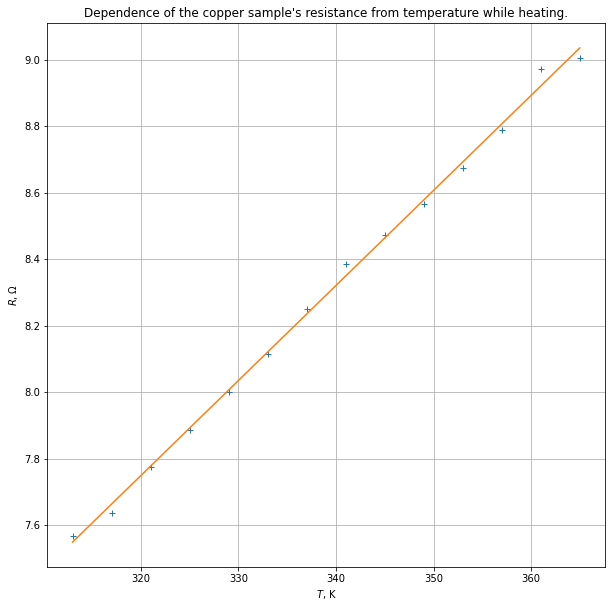

In [172]:
plt.figure(figsize=(10, 10))
plt.plot(data['T'], data['R_sa'], '+')
plt.plot(data['T'], a * data['T'] + b)
plt.xlabel('$T$, K')
plt.ylabel('$R, \Omega$')
plt.title('Dependence of the copper sample\'s resistance from temperature while heating.')
plt.grid()
plt.savefig('1_Cu_heating')
plt.show()

In [173]:
a / 7.2 # Учтем знание о сопротивлении образца R = 7.2 Ом при комнатной (293 К) температуре.

0.0039713914040341945

## Нихром
- Nichrome series 1 -- неудачная попытка охлаждения и нагрева образца, сильные флуктуации напряжения на шунте из-за отвратительных контактов. _Обрабатываться не будет_.
- Nichrome series 2 -- удавшийся младший брат Nichrome series 1.
- Nichrome heat series 1 -- нагрев образца из нихром с комнатной температуры до температуры кипения воды.

In [174]:
data = pd.read_csv('Nichrome series 2.csv', delimiter=';', index_col=0)
data

,Time,V_sa,V_sh,I,R_sa,T
0,0.000442,4.061861,0.000328,0.043673,93.005801,296.726985
1,0.001429,4.073559,0.000327,0.043552,93.534258,297.251148
2,0.004438,4.079725,0.000326,0.043508,93.768656,297.532340
3,0.059017,4.078958,0.000326,0.043416,93.949917,297.585350
4,0.115147,4.079284,0.000327,0.043600,93.561225,297.644752
...,...,...,...,...,...,...
833,41.087922,4.089544,0.000331,0.044100,92.733335,276.084265
834,41.130396,4.088196,0.000330,0.044052,92.804842,276.191042
835,41.171280,4.092557,0.000331,0.044160,92.675936,276.294005
836,41.222736,4.092419,0.000330,0.044051,92.901826,276.387850


In [175]:
a, b = fit(linear, data['T'], data['R_sa'].values)[0]

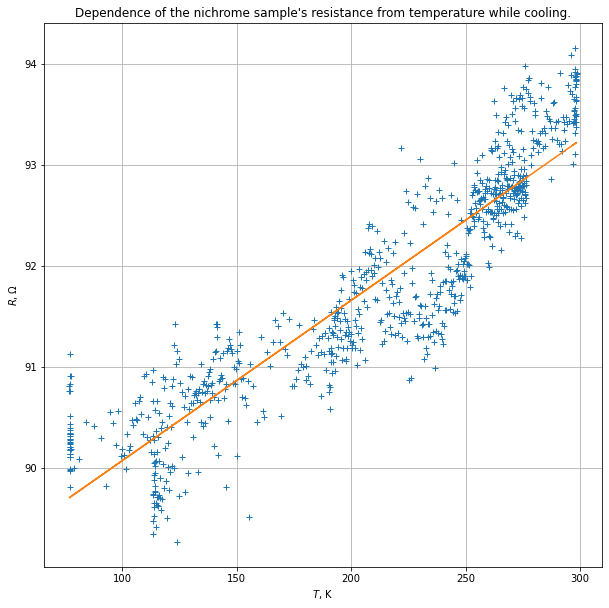

In [176]:
plt.figure(figsize=(10, 10))
plt.plot(data['T'], data['R_sa'], '+')
plt.plot(data['T'], a * data['T'] + b)
plt.xlabel('$T$, K')
plt.ylabel('$R, \Omega$')
plt.title('Dependence of the nichrome sample\'s resistance from temperature while cooling.')
plt.grid()
plt.savefig('1_Ni_cooling')
plt.show()

In [177]:
a / 95

0.00016691915991114402

In [178]:
data = pd.read_csv('Nichrome heat series 1.csv', delimiter=';', index_col=0)
data

,Time,V_sa,V_sh,I,R_sa,T
0,0.000389,4.170435,0.000329,0.043874,95.054246,272.817974
1,0.077359,4.171170,0.000329,0.043826,95.175594,274.227773
2,0.129452,4.172770,0.000329,0.043923,95.002274,275.115616
3,0.180646,4.168253,0.000329,0.043832,95.096501,275.891840
4,0.236825,4.170212,0.000329,0.043927,94.935588,276.648822
...,...,...,...,...,...,...
683,36.983103,4.270530,0.000334,0.044584,95.786962,356.895970
684,37.034765,4.268779,0.000334,0.044512,95.902708,356.800699
685,37.082078,4.269906,0.000334,0.044498,95.957099,356.649463
686,37.129356,4.268040,0.000334,0.044551,95.800807,356.589327


In [179]:
a, b = fit(linear, data['T'], data['R_sa'].values)[0]

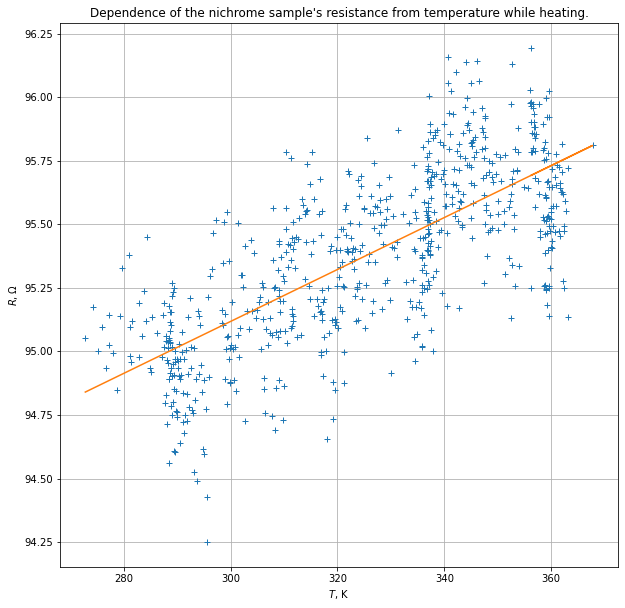

In [180]:
plt.figure(figsize=(10, 10))
plt.plot(data['T'], data['R_sa'], '+')
plt.plot(data['T'], a * data['T'] + b)
plt.xlabel('$T$, K')
plt.ylabel('$R, \Omega$')
plt.title('Dependence of the nichrome sample\'s resistance from temperature while heating.')
plt.grid()
plt.savefig('1_Ni_Heating')
plt.show()

In [181]:
a / 95

0.00010755057629462373